# Problrm 6

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
x_validate = np.concatenate([x_train[48000:], x_test[:4000]])
y_validate = np.concatenate([y_train[48000:], y_test[:4000]])

x_train = x_train[:48000]
y_train = y_train[:48000]

x_test = x_test[4000:]
y_test = y_test[4000:]

print('train data:', x_train.shape)
print('validation data:', x_validate.shape)
print('test data:', x_test.shape)

train data: (48000, 32, 32, 3)
validation data: (6000, 32, 32, 3)
test data: (6000, 32, 32, 3)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [6]:
model.compile(optimizer='adam', metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False))

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_validate, y_validate))

Epoch 1/10
1500/1500 [==============================] - 43s 28ms/step - loss: 2.3568 - accuracy: 0.2955 - val_loss: 1.6168 - val_accuracy: 0.4077
Epoch 2/10
1500/1500 [==============================] - 42s 28ms/step - loss: 1.4589 - accuracy: 0.4705 - val_loss: 1.3367 - val_accuracy: 0.5350
Epoch 3/10
1500/1500 [==============================] - 42s 28ms/step - loss: 1.2251 - accuracy: 0.5610 - val_loss: 1.1493 - val_accuracy: 0.5925
Epoch 4/10
1500/1500 [==============================] - 42s 28ms/step - loss: 1.1251 - accuracy: 0.6001 - val_loss: 1.1592 - val_accuracy: 0.5985
Epoch 5/10
1500/1500 [==============================] - 42s 28ms/step - loss: 1.0461 - accuracy: 0.6314 - val_loss: 1.0584 - val_accuracy: 0.6312
Epoch 6/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.9928 - accuracy: 0.6497 - val_loss: 1.0645 - val_accuracy: 0.6365
Epoch 7/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.9399 - accuracy: 0.6694 - val_loss: 1.0955 -

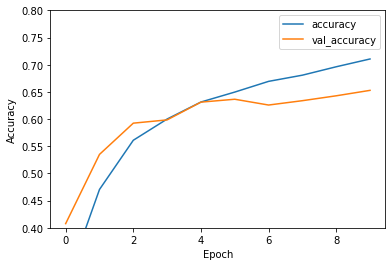

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 0.8])
plt.legend()
plt.show()

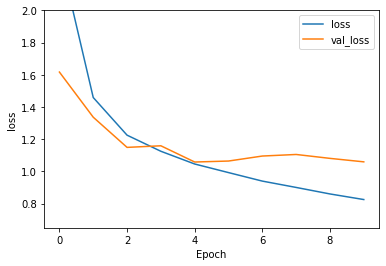

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.65, 2])
plt.legend()
plt.show()

In [9]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

188/188 [==============================] - 2s 8ms/step


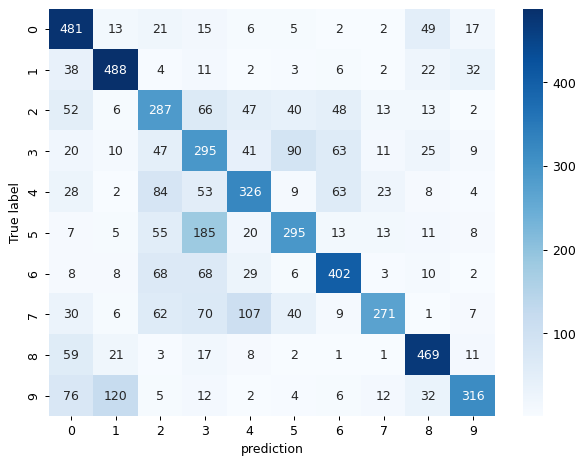

In [10]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=90)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('prediction')
ax.set_ylabel('True label')
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=3)
print("test accuracy: {:.2f}%".format(test_acc*100))

test accuracy: 65.42%
